In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

<ipython-input-3-7d202ea570ea>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
df= pd.read_csv('/content/S&P dataset.csv')

In [ ]:
df.describe

<bound method NDFrame.describe of             Date         Open         High          Low        Close  \
0     2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   
1     2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044   
2     2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985   
3     2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951   
4     2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971   
...          ...          ...          ...          ...          ...   
5212  2020-09-21  3285.570068  3285.570068  3229.100098  3281.060059   
5213  2020-09-22  3295.750000  3320.310059  3270.949951  3315.570068   
5214  2020-09-23  3320.110107  3323.350098  3232.570068  3236.919922   
5215  2020-09-24  3226.139893  3278.699951  3209.449951  3246.590088   
5216  2020-09-25  3236.659912  3306.879883  3228.439941  3298.459961   

        Adj Close      Volume  
0     1455.219971   931800000  
1     1399.420044  1009000000  
2     1402.109985  1085500000  
3     1403.449951  1092300000  
4     1441.469971  1225200000  
...           ...         ...  
5212  3281.060059  4828350000  
5213  3315.570068  3963300000  
5214  3236.919922  4364500000  
5215  3246.590088  4599470000  
5216  3298.459961  3792220000  

[5217 rows x 7 columns]>

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5212,2020-09-21,3285.570068,3285.570068,3229.100098,3281.060059,3281.060059,4828350000
5213,2020-09-22,3295.750000,3320.310059,3270.949951,3315.570068,3315.570068,3963300000
5214,2020-09-23,3320.110107,3323.350098,3232.570068,3236.919922,3236.919922,4364500000
5215,2020-09-24,3226.139893,3278.699951,3209.449951,3246.590088,3246.590088,4599470000
5216,2020-09-25,3236.659912,3306.879883,3228.439941,3298.459961,3298.459961,3792220000


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df = df.set_index("Date")
print(df.shape)
print(df.columns)

(5217, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


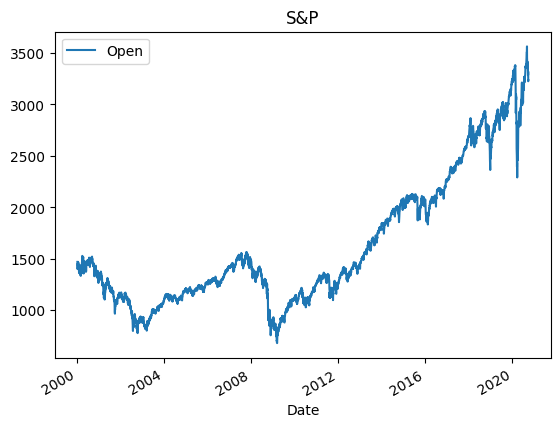

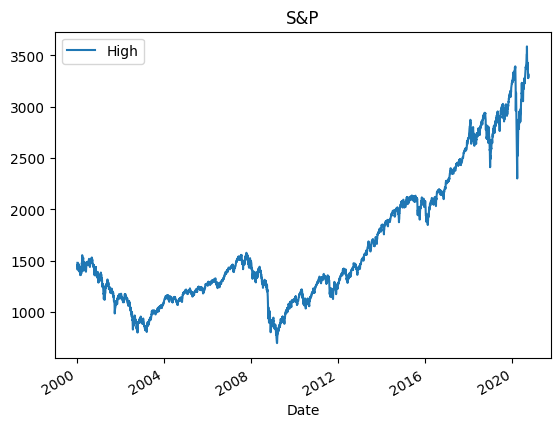

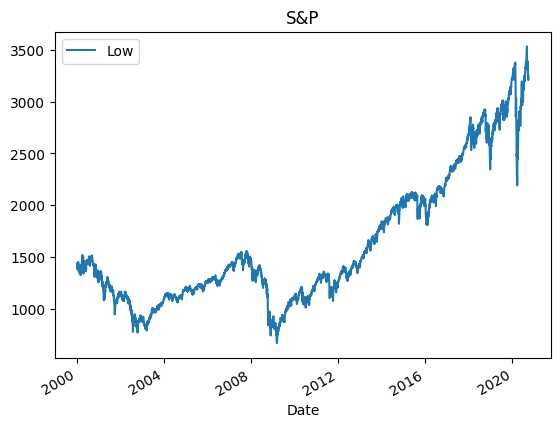

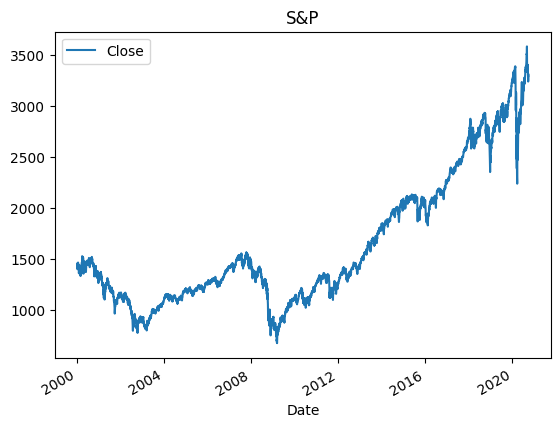

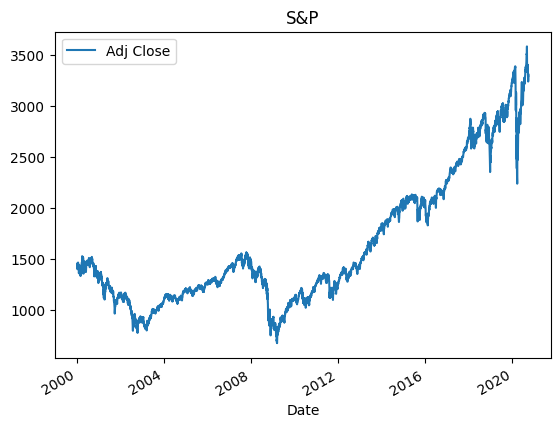

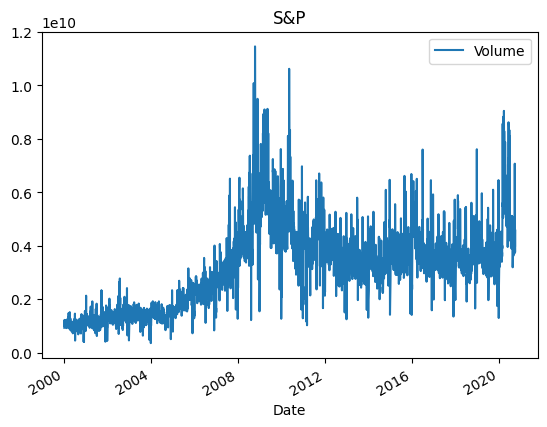

In [ ]:
for i in  df.columns:
  df[[i]].plot()
  plt.title("S&P")
  plt.show()

Text(0.5, 1.0, 'S&P Cumulative Returns')

<Figure size 2000x2000 with 0 Axes>

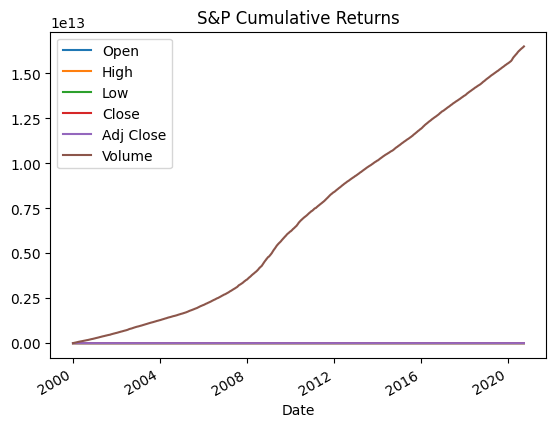

In [ ]:
plt.figure(figsize=(20,20))
dr = df.cumsum()
dr.plot()
plt.title('S&P Cumulative Returns')

<Axes: ylabel='Date'>

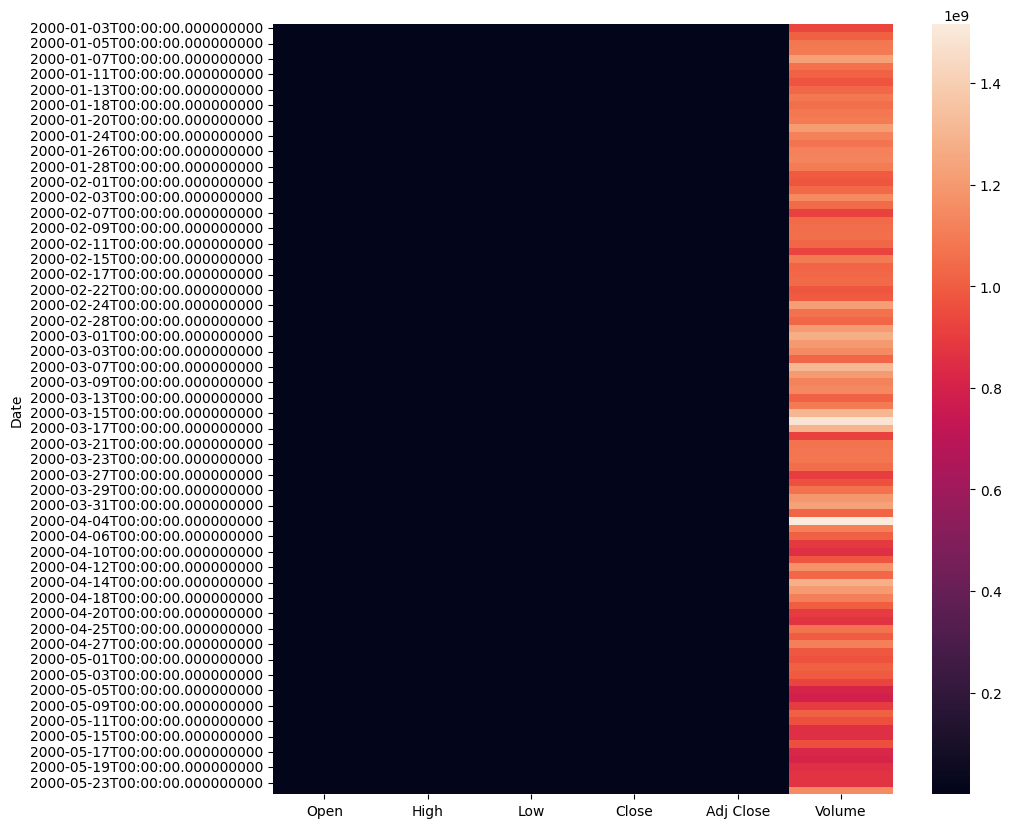

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[:100],   robust=False,
                annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True,
                 square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)

In [ ]:
df[0]

NameError: name 'df' is not defined

In [ ]:
import numpy as np
def create_dataset(dataset,time_stamp =1):
  X, Y = [], []
  for i in range(len(dataset)-time_stamp-1):
    a= dataset[i:(i+time_stamp),0]
    X.append(a)
    Y.append(df[i+time_stamp,0])
  return np.array(X),np.array(Y)

In [ ]:
train=df[0:3000]
test =df[3500:]

In [ ]:
time_stamp=100
x_train, y_train=create_dataset(train,time_stamp)
x_test, y_test = create_dataset(test, time_stamp)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
print(x_test)
print(x_train)
print(x_train.shape)

[[0.39067256 0.38843719 0.38602857 ... 0.41589207 0.41681048 0.41533757]
 [0.38843719 0.38602857 0.38591418 ... 0.41681048 0.41533757 0.41092928]
 [0.38602857 0.38591418 0.38436851 ... 0.41533757 0.41092928 0.41293243]
 ...
 [0.78033655 0.75891195 0.74016968 ... 0.92449042 0.9281362  0.90324942]
 [0.75891195 0.74016968 0.7588391  ... 0.9281362  0.90324942 0.90677743]
 [0.74016968 0.7588391  0.76378113 ... 0.90324942 0.90677743 0.9152198 ]]
[[0.2737761  0.26891378 0.24957547 ... 0.25218507 0.25002598 0.24071724]
 [0.26891378 0.24957547 0.25050771 ... 0.25002598 0.24071724 0.24944724]
 [0.24957547 0.25050771 0.25097209 ... 0.24071724 0.24944724 0.24337194]
 ...
 [0.23327649 0.2301297  0.22191608 ... 0.17612442 0.16708948 0.1661399 ]
 [0.2301297  0.22191608 0.22012779 ... 0.16708948 0.1661399  0.17788499]
 [0.22191608 0.22012779 0.221268   ... 0.1661399  0.17788499 0.17932668]]
(2899, 100)


In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(1616, 100, 1)
(1616,)


In [ ]:
print(x_train.shape)
print(y_train.shape)

(2899, 100, 1)
(2899,)


In [ ]:
x_train

NameError: name 'x_train' is not defined

In [ ]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False,
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 11s 21ms/step - loss: 0.0018 - val_loss: 3.3245e-04
Epoch 2/50
164/164 [==============================] - 2s 14ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/50
164/164 [==============================] - 2s 14ms/step - loss: 0.0016 - val_loss: 6.0106e-04
Epoch 4/50
164/164 [==============================] - 2s 14ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 5/50
164/164 [==============================] - 3s 19ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 6/50
164/164 [==============================] - 2s 14ms/step - loss: 0.0022 - val_loss: 0.0053
Epoch 7/50
164/164 [==============================] - 2s 14ms/step - loss: 0.0024 - val_loss: 0.0068
Epoch 8/50
164/164 [==============================] - 2s 14ms/step - loss: 0.0030 - val_loss: 0.0062
Epoch 9/50
164/164 [==============================] - 2s 14ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 10/50
164/164 [==============================] - 3s 17ms/step - loss: 0.0026

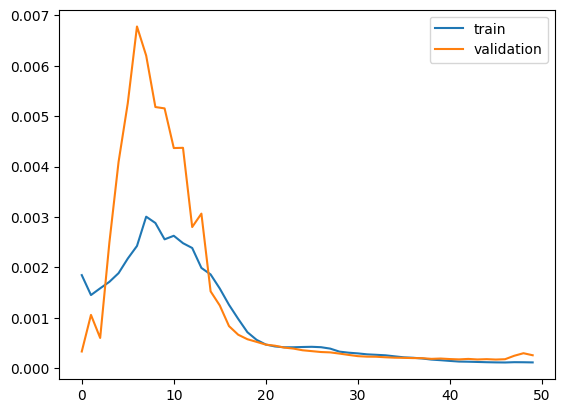

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

51/51 [==============================] - 0s 6ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error, precision_score,recall_score,f1_score
math.sqrt(mean_squared_error(y_train,train_predict))
from sklearn.metrics import confusion_matrix
x=confusion_matrix=(x_test, model.predict(x_test))


51/51 [==============================] - 1s 10ms/step


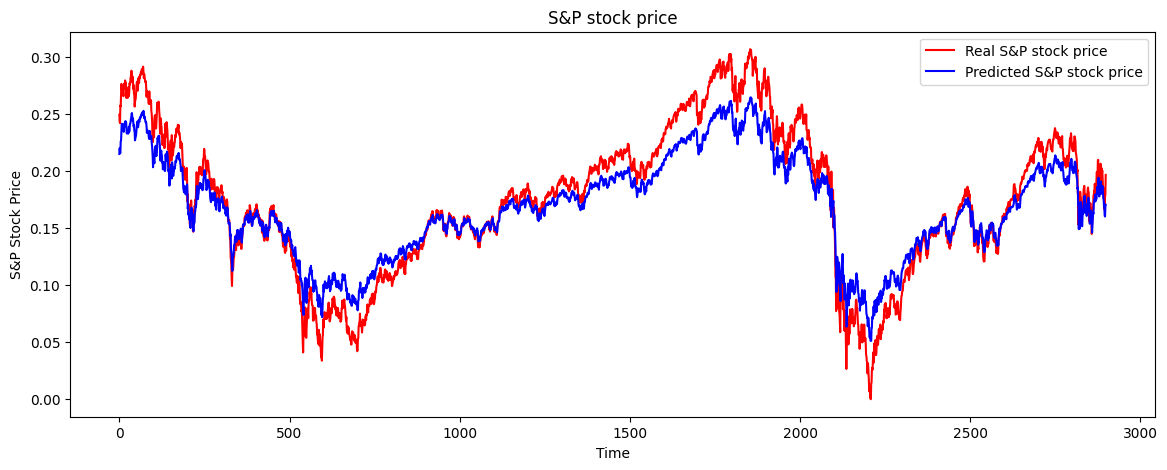

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

In [ ]:
model=Sequential()
model.add(tf.keras.layers.GRU(100,return_sequences=True,input_shape=(100,1)))
model.add(tf.keras.layers.GRU(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False,
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 7s 14ms/step - loss: 0.0020 - val_loss: 2.5711e-04
Epoch 2/50
164/164 [==============================] - 2s 10ms/step - loss: 9.2413e-04 - val_loss: 2.1244e-04
Epoch 3/50
164/164 [==============================] - 2s 10ms/step - loss: 9.8467e-04 - val_loss: 2.3595e-04
Epoch 4/50
164/164 [==============================] - 2s 11ms/step - loss: 0.0011 - val_loss: 3.4845e-04
Epoch 5/50
164/164 [==============================] - 2s 13ms/step - loss: 0.0013 - val_loss: 3.8756e-04
Epoch 6/50
164/164 [==============================] - 2s 11ms/step - loss: 0.0013 - val_loss: 6.9908e-04
Epoch 7/50
164/164 [==============================] - 2s 10ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 8/50
164/164 [==============================] - 2s 10ms/step - loss: 0.0018 - val_loss: 0.0039
Epoch 9/50
164/164 [==============================] - 2s 10ms/step - loss: 0.0019 - val_loss: 0.0051
Epoch 10/50
164/164 [==============================] - 2s 1

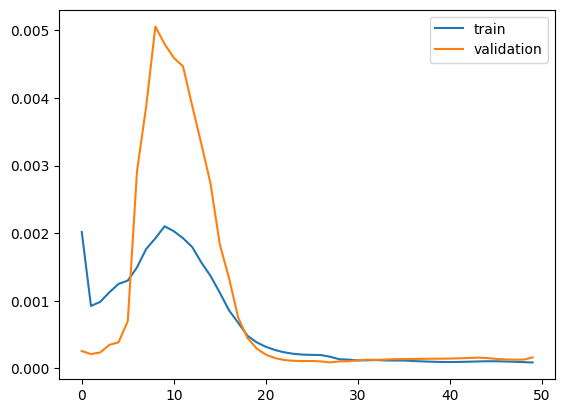

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()


In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

51/51 [==============================] - 0s 6ms/step


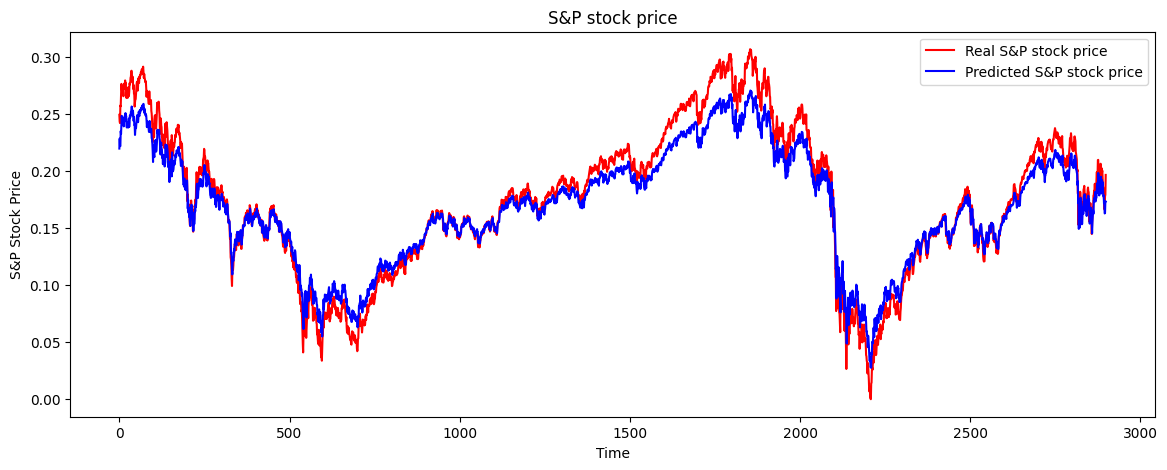

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()